# Lab 4 : Foreground Extraction, Background Subtraction
#### Name:- Sruthi Nayagi 
#### Reg.no:- 19BAI1037 
#### Subject:- Computer Vision in Healthcare Application (CSE4038) 
#### Faculty-In-Charge:- Dr.BALASUNDARAM A
#### Lab Slot:- L27+L28 
#### Date of Submission:- 24/2/2022
#### Dataset Used:- Chest X-ray 

## Importing necessary libraries

In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
from scipy import ndimage
from keras.preprocessing import image
import cv2
from google.colab.patches import cv2_imshow

## Mounting Drive

In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## Loading a image from the dataset

In [3]:
image = cv2.imread('/content/gdrive/MyDrive/chest_xray/train/NORMAL/IM-0115-0001.jpeg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [4]:
image = cv2.resize(image, (256, 256))

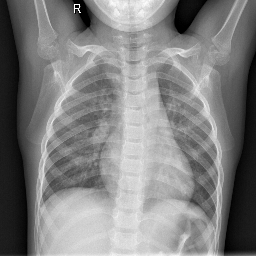

In [5]:
cv2_imshow(image)

## Foreground Extraction

#### The goal foreground to be extracted is the bone border region, and we'll use two distinct algorithms to do so: Grabcut and Contour Detection.

### (i) GrabCut Algorithm

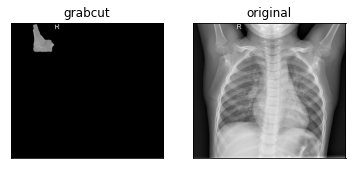

In [6]:
img  =	cv2.imread('/content/gdrive/MyDrive/chest_xray/train/NORMAL/IM-0115-0001.jpeg')
mask =	np.zeros(img.shape[:2],np.uint8)

bgdModel =  np.zeros((1,65),np.float64)
fgdModel =  np.zeros((1,65),np.float64)

rect =	(300,30,421,378)
cv2.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)

mask2  =  np.where((mask==2)|(mask==0),0,1).astype('uint8')
img  =	img*mask2[:,:,np.newaxis]

plt.subplot(121),  plt.imshow(img)
plt.title("grabcut"),	plt.xticks([]),	plt.yticks([])
plt.subplot(122),
plt.imshow(cv2.cvtColor(cv2.imread('/content/gdrive/MyDrive/chest_xray/train/NORMAL/IM-0115-0001.jpeg'),
cv2.COLOR_BGR2RGB))
plt.title("original"),	plt.xticks([]),	plt.yticks([])

plt.show()

### The idea was to isolate the chest areas as foreground and treat the rest as background. We can see that these cells were retrieved, but with some additional background information.

### (ii) Contour Detection Algorithm

#### Contour Detection Algorithm requires a grayscale image where we will first perform thresholding and then find countours and draw boundaries on the original coloured image.

In [7]:
# read the image
image = cv2.imread('/content/gdrive/MyDrive/chest_xray/train/NORMAL/IM-0115-0001.jpeg')

In [8]:
# convert the image to grayscale format
img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

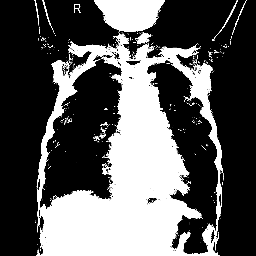

In [9]:
# apply binary thresholding
ret, thresh = cv2.threshold(img_gray, 159, 255, cv2.THRESH_BINARY)
# visualize the binary image
image = cv2.resize(thresh, (256, 256))   
cv2_imshow(image)

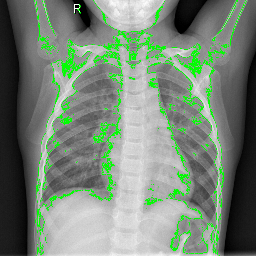

In [10]:
# detect the contours on the binary image using cv2.CHAIN_APPROX_NONE
contours, hierarchy = cv2.findContours(image=thresh, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)
                                     
# draw contours on the original image
image_copy = cv2.imread('/content/gdrive/MyDrive/chest_xray/train/NORMAL/IM-0115-0001.jpeg')
cv2.drawContours(image=image_copy, contours=contours, contourIdx=-1, color=(0, 255, 0), thickness=2, lineType=cv2.LINE_AA)
image = cv2.resize(image_copy, (256, 256))               
# see the results
cv2_imshow(image)

### (iii) Which foregorund extraction algorithm is better?

### We can see that the contour forms borders around both the bone region and the slide's boundary. Contour detection, which identifies the slide's border, is a superior approach in this situation since it exactly defines the purple zone, whereas grabcut's foreground extraction is more ambiguous.

# Background subtraction

#### The 3 algorithms used for background subtraction are BackgroundSubtractorMOG, BackgroundSubtractorMOG2 and BackgroundSubtractorGMG.

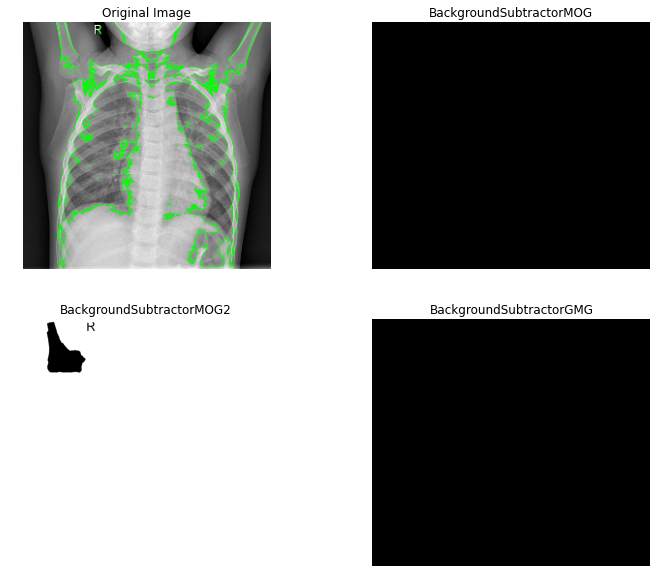

In [11]:
plt.figure(figsize=(12,10))

# creating object
fgbg1 = cv2.bgsegm.createBackgroundSubtractorMOG()
fgbg2 = cv2.createBackgroundSubtractorMOG2()
fgbg3 = cv2.bgsegm.createBackgroundSubtractorGMG()

# apply mask for background subtraction
fgmask1 = fgbg1.apply(img);
fgmask2 = fgbg2.apply(img);
fgmask3 = fgbg3.apply(img);

# Plotting all the images in subplots
plt.subplot(2,2,1)
plt.imshow(image)
plt.title("Original Image")
plt.axis("off")

plt.subplot(2,2,2)
plt.imshow(fgmask1, cmap="gray")
plt.title("BackgroundSubtractorMOG")
plt.axis("off")

plt.subplot(2,2,3)
plt.imshow(fgmask2, cmap="gray")
plt.title("BackgroundSubtractorMOG2")
plt.axis("off")

plt.subplot(2,2,4)
plt.imshow(fgmask3, cmap="gray")
plt.title("BackgroundSubtractorGMG")
plt.axis("off")

plt.show()

### Which Background Subtraction algorithm is better?

### BackgroundSubtractorMOG2 is clearly superior to the other two approaches, which fail to distinguish the region of interest (pink/purple lump of cells) and instead highlight the whole image in black. As a result, for this image, BackgroundSubtractorMOG2 is the superior Background subtraction technique.